In [1]:
import pandas as pd
import numpy as np
from statistics import variance
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot
import plotly.express as px
from matplotlib.ticker import MaxNLocator, AutoMinorLocator
import warnings
warnings.filterwarnings('ignore')

In [2]:
# modeled columns, all categorical features are numbers
df = pd.read_csv('df.csv')
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [3]:
df['order date y'] = pd.to_datetime(pd.Series(df['order date y-m'], )).dt.strftime('%Y')

***

Setting up funcitons for plots

In [4]:
#weights = y, hue=break up each bar, xtickrange=range(), xticklabel=df[col]
def hist_plot(data, x=None, weights=None, hue=None, xtickrange=None, xticklabel=None):
    sns.histplot(data=data, x=x, weights=weights, hue=hue, multiple='stack',  )
    plt.xticks(ticks=xtickrange , labels=xticklabel.unique());
    return plt.show()

In [5]:
def pie_chart(data, x=None, labels=None, title=None):
    plt.pie(data[x], labels=data[labels], startangle=90, autopct='%.0f%%')
    plt.xlabel('{} %'.format(title))
    return plt.show();

### Delivery Status

What is the late delivery percentage? 

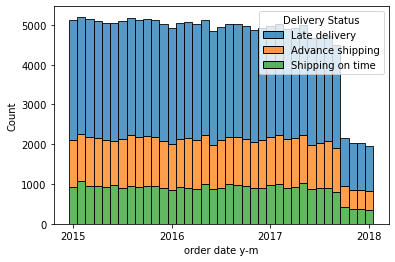

In [6]:
order_date_del_stat = df.groupby(['Delivery Status', 'order date y-m'])['Type'].count().reset_index(name='count').sort_values(by='count', ascending=False)

hist_plot(order_date_del_stat, x='order date y-m', weights='count', hue='Delivery Status',xtickrange=range(0,len(order_date_del_stat['order date y-m'].unique()), 12), xticklabel=df['order date y'])

Total shipping is about 5000 each month. On time and Advanced shipping is roughly 2000 each month.

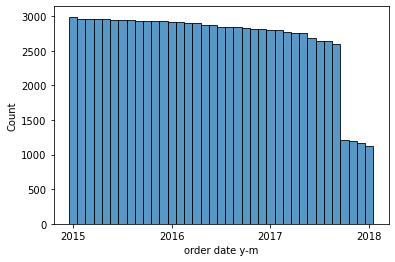

In [7]:
order_date_late_risk = df[df['Delivery Status'] == 'Late delivery'].groupby(['order date y-m'])['Delivery Status'].count().reset_index(name='count').sort_values(by='count', ascending=False)

hist_plot(order_date_late_risk, x='order date y-m', weights='count', hue=None, xtickrange=range(0,len(order_date_late_risk['order date y-m'].unique()), 12), xticklabel=df['order date y'])

Number of late deliveries each month, usually between 2500-3000 per month. 

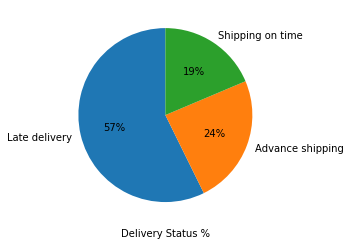

In [8]:
#change pie chart labels!!!***
late_risk =  df.groupby(by=['Delivery Status']).count()['Type'].reset_index(name='count').sort_values(by='count', ascending=False)

pie_chart(late_risk, 'count', 'Delivery Status', title='Delivery Status')

The risk of having a late delivery is over 50%.

***

#### Delivery Status for each Shipping Mode

Where is the company shipping to, and what is the delivery status for the customers?

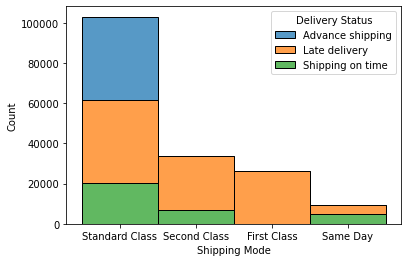

In [9]:
# each deliver status value split with values of each customer customer state
df_delivery_status_ship_mode= df.groupby(['Delivery Status', 'Shipping Mode'])['Type'].count().reset_index(name='count').sort_values(by='count', ascending= False)

hist_plot(df_delivery_status_ship_mode, x='Shipping Mode', weights='count', hue='Delivery Status', xtickrange=range(0,len(df_delivery_status_ship_mode['Shipping Mode'].unique())), xticklabel=df_delivery_status_ship_mode['Shipping Mode'])

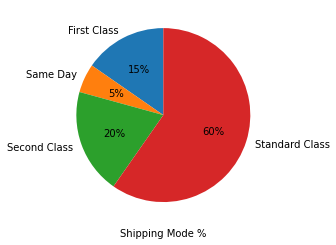

In [10]:
ship_mode_count = df.groupby(by=["Shipping Mode"]).count()['Type'].reset_index()

pie_chart(ship_mode_count, x='Type', labels='Shipping Mode', title='Shipping Mode')

Standard class is the only delivery service that is able to provide advance shipping. This could be because it gives the most amount of time to be shipped. Second class doesn't provide enough time to be early, so it can either be on time or late. First class is less time to deliver and is unable to ship any on time. Same day shipping can't be any eariler, unable to advance ship.

###### Standard Class

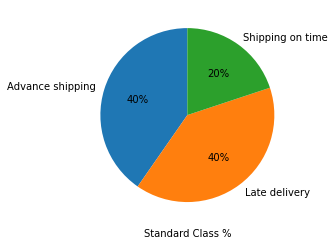

In [11]:
standard_class_del_stat = df_delivery_status_ship_mode[df_delivery_status_ship_mode['Shipping Mode'] == 'Standard Class']

pie_chart(standard_class_del_stat, x='count', labels='Delivery Status', title='Standard Class')

##### First Class

Is either going to be on time or late since it is not possible for it to arrive any earlier.

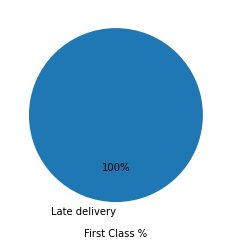

In [12]:
first_class_del_stat = df_delivery_status_ship_mode[df_delivery_status_ship_mode['Shipping Mode'] == 'First Class']

pie_chart(first_class_del_stat, x='count', labels='Delivery Status', title='First Class')

##### Second Class

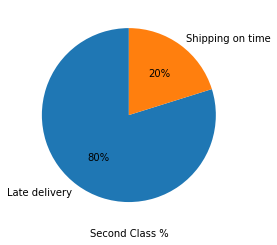

In [13]:
second_class_del_stat = df_delivery_status_ship_mode[df_delivery_status_ship_mode['Shipping Mode'] == 'Second Class']

pie_chart(second_class_del_stat, x='count', labels='Delivery Status', title='Second Class')

##### Same day Shipping

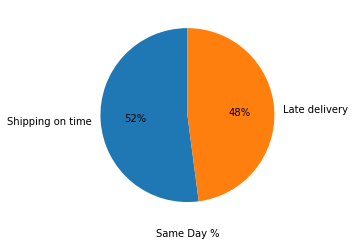

In [14]:
sameday_del_stat = df_delivery_status_ship_mode[df_delivery_status_ship_mode['Shipping Mode'] == 'Same Day']

pie_chart(sameday_del_stat, x='count', labels='Delivery Status', title='Same Day')

Standard Class appears to be the least likely for a late delivery. 

***

#### Delivery Status for Each Market

How is the company's delivery sataus to each market orders are delivered to?

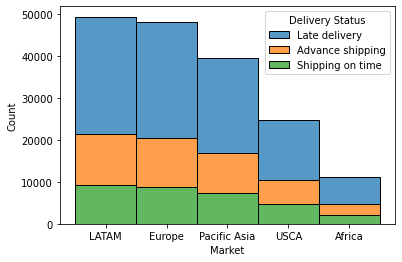

In [15]:
# good
# each market supdivided into delivery status
df_delivery_status_market=df.groupby(['Delivery Status', 'Market'])['Type'].count().reset_index(name='count').sort_values(by= 'count', ascending= False)

hist_plot(df_delivery_status_market, x='Market', weights='count', hue='Delivery Status', xtickrange=range(0,len(df_delivery_status_market['Market'].unique())), xticklabel=df_delivery_status_market['Market'])

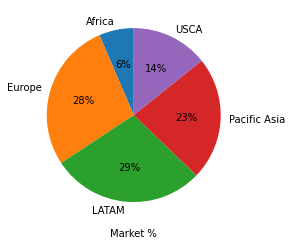

In [16]:
market_pie = df.groupby('Market').count()['Type'].reset_index(name='count')

pie_chart(market_pie, x='count', labels='Market', title='Market')

Latin America, Europe, and Pacific Asia are the bulk of deliveries shipped to.

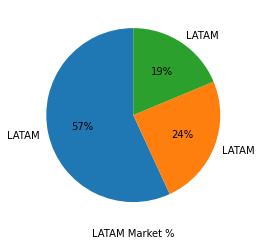

In [17]:
latam_del_stat = df_delivery_status_market[df_delivery_status_market['Market'] == 'LATAM']

pie_chart(latam_del_stat, x='count', labels='Market', title='LATAM Market')

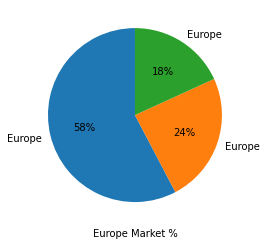

In [18]:
europe_del_stat = df_delivery_status_market[df_delivery_status_market['Market'] == 'Europe']

pie_chart(europe_del_stat, x='count', labels='Market', title='Europe Market')

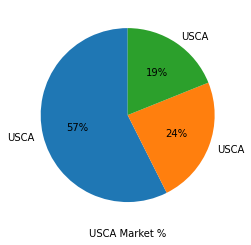

In [19]:
usca_del_stat = df_delivery_status_market[df_delivery_status_market['Market'] == 'USCA']

pie_chart(usca_del_stat, x='count', labels='Market', title='USCA Market')

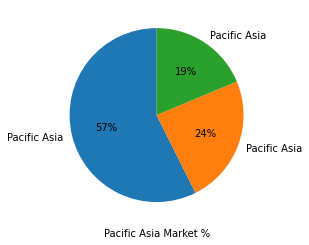

In [20]:
pa_del_stat = df_delivery_status_market[df_delivery_status_market['Market'] == 'Pacific Asia']

pie_chart(pa_del_stat, x='count', labels='Market', title='Pacific Asia Market')

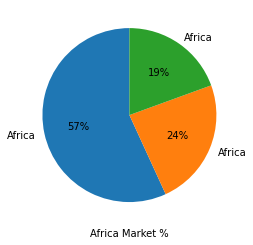

In [21]:
africa_del_stat = df_delivery_status_market[df_delivery_status_market['Market'] == 'Africa']

pie_chart(africa_del_stat, x='count', labels='Market', title='Africa Market')

It appears most orders are late to each market, while advance and on time shipping make up most of the other half of shipments. All Markets appear to have equal delivery status percentages.  

***

#### Delivery Status for each Customer Segment

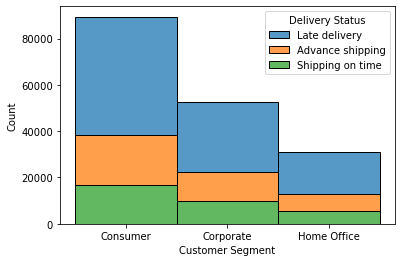

In [22]:
# good
# each customer segment subdivided into delivery status
df_delivery_status_segment=df.groupby(['Customer Segment','Delivery Status'])['Type'].count().reset_index(name='count').sort_values(by= 'count', ascending= False)

hist_plot(df_delivery_status_segment, x='Customer Segment', weights='count', hue='Delivery Status', xtickrange=range(0,len(df_delivery_status_segment['Customer Segment'].unique())), xticklabel=df_delivery_status_segment['Customer Segment'])

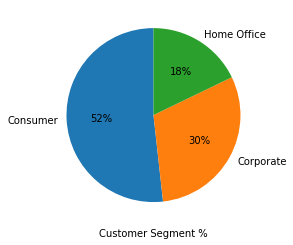

In [23]:
cust_seg_pie = df.groupby('Customer Segment').count()['Type'].reset_index(name='count')

pie_chart(cust_seg_pie, x='count', labels='Customer Segment', title='Customer Segment')

Consumer segment is about half the orders, Corporate at 30% and Home Office 18%

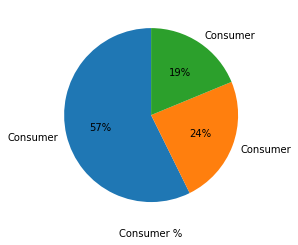

In [24]:
consumer_del_stat = df_delivery_status_segment[df_delivery_status_segment['Customer Segment'] == 'Consumer']

pie_chart(consumer_del_stat, x='count', labels='Customer Segment', title='Consumer')

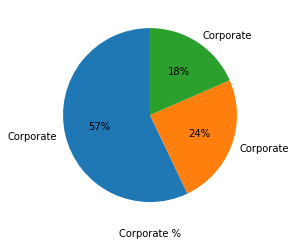

In [25]:
corprate_del_stat = df_delivery_status_segment[df_delivery_status_segment['Customer Segment'] == 'Corporate']

pie_chart(corprate_del_stat, x='count', labels='Customer Segment', title='Corporate')

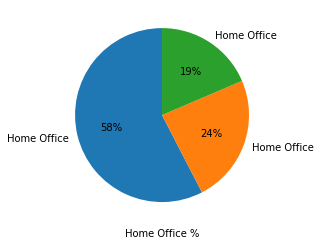

In [26]:
ho_del_stat = df_delivery_status_segment[df_delivery_status_segment['Customer Segment'] == 'Home Office']

pie_chart(ho_del_stat, x='count', labels='Customer Segment', title='Home Office')

It appears each customer segment has more than half late deliveries. Shipping on time (24%) and advance shipping (18.5%) do not vary between customer segments either. 

***

### Orders Throughout 2015 - 2017

Changing the date between 2015-01 to 2017-10, since there is a sudden decrease in orders towards the end of the data set. Makes graphs difficult to look at. 

In [27]:
# delet data from 2017-10 to 2018-01, has a drop off, looks bad on graph
filtered_df = df.loc[(df['order date y-m'] >= '2017-10')
                     & (df['order date y-m'] < '2018-02')]

In [28]:
# deleting timeline past 2017-12
df_2015_2017 = df.drop(index=range(filtered_df.index.min(),filtered_df.index.max()+1), axis=0)

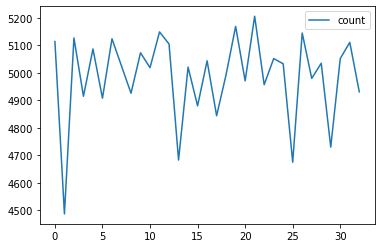

In [29]:
# count on orders per year-month
month_count_order_date = df_2015_2017.groupby(by=['order date y-m']).count()['Type'].reset_index(name='count')

sns.lineplot(scalex='order date y-m', scaley='count', data=month_count_order_date);

Looks like in Janurary and Feburary there is a decrease in orders. 

In [30]:
#convert date to year to observe delivery status per year
od_year = pd.to_datetime(pd.Series(df_2015_2017['order date y-m'])).dt.strftime('%Y')

In [31]:
df_2015_2017 = pd.concat([df_2015_2017, od_year], axis=1)
df_2015_2017['order date y'] = df_2015_2017['order date y-m'].iloc[:, 1]
df_2015_2017.drop(columns=['order date y-m'], axis=1, inplace=True)

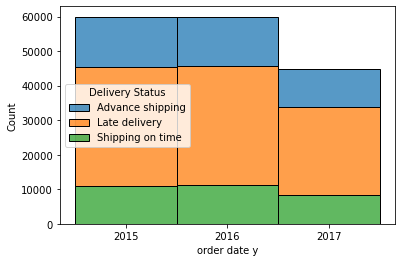

In [32]:
month_count_order_date_del_stat = df_2015_2017.groupby(by=['order date y', 'Delivery Status']).count()['Type'].reset_index(name='count').sort_values(by='order date y')

hist_plot(month_count_order_date_del_stat, x='order date y', weights='count', hue='Delivery Status', xtickrange=range(0,len(month_count_order_date_del_stat['order date y'].unique())), xticklabel=month_count_order_date_del_stat['order date y'])

Here we can observe each months count subdivided by the delivery status. 

In [33]:
month_count_order_date.mean()

count    4987.030303
dtype: float64

From 2015/01-2017/10 there is an average of 5000 orders. 

In [34]:
month_count_order_date.std()

count    159.145469
dtype: float64

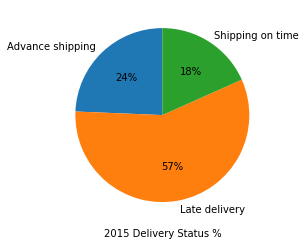

In [35]:
del_stat_2015 = month_count_order_date_del_stat[month_count_order_date_del_stat['order date y'] == '2015']

pie_chart(del_stat_2015, x='count', labels='Delivery Status', title='2015 Delivery Status')

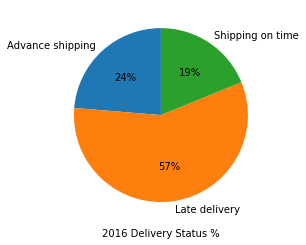

In [36]:
del_stat_2016 = month_count_order_date_del_stat[month_count_order_date_del_stat['order date y'] == '2016']

pie_chart(del_stat_2016, x='count', labels='Delivery Status', title='2016 Delivery Status')

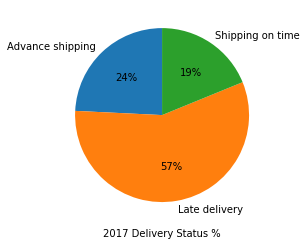

In [37]:
del_stat_2017 = month_count_order_date_del_stat[month_count_order_date_del_stat['order date y'] == '2017']

pie_chart(del_stat_2017, x='count', labels='Delivery Status', title='2017 Delivery Status')

Each year over half the orders are late, about a quarter are in advance and about a fifth receive their order on time. 

***

###### Visualize Correlation with Heatmap

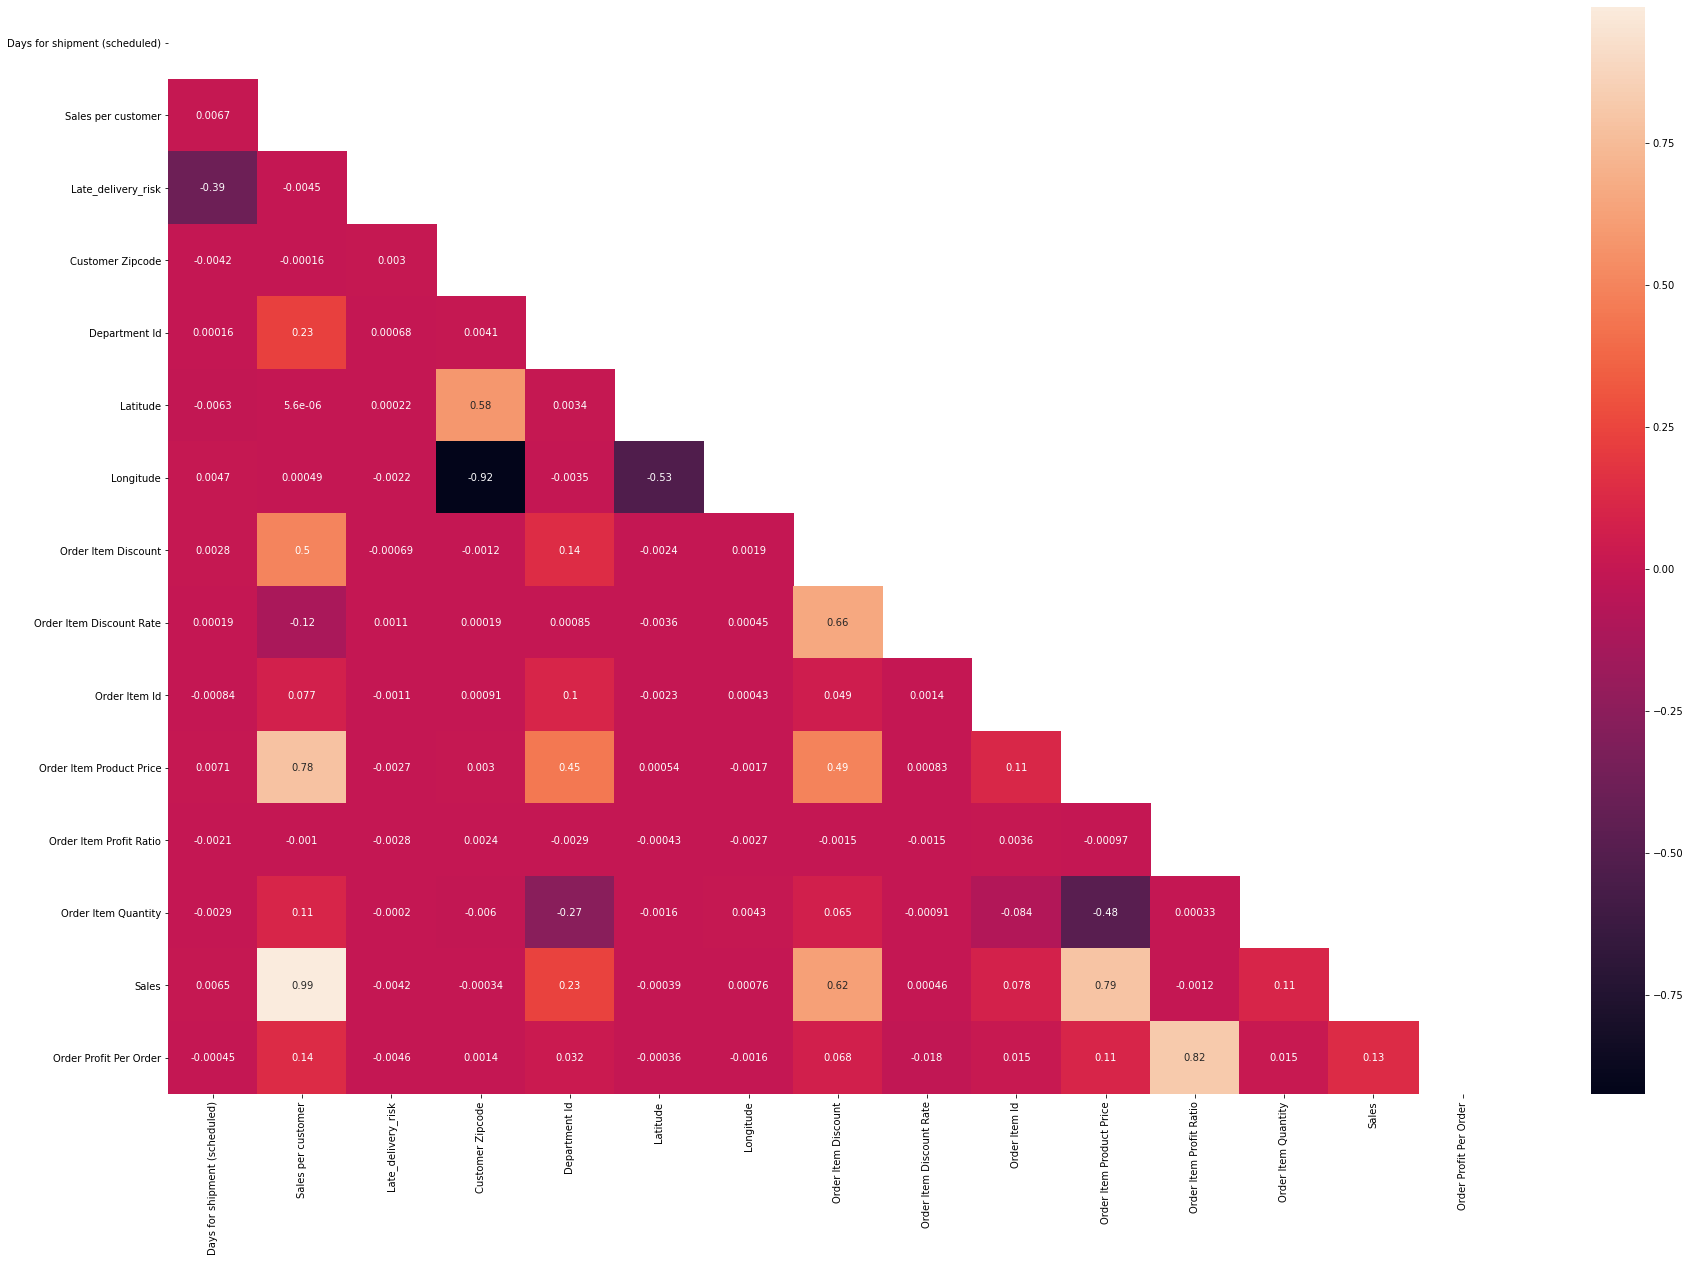

In [38]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(corr, mask=mask, annot = True);

In [39]:
df.corr()

,Days for shipment (scheduled),Sales per customer,Late_delivery_risk,Customer Zipcode,Department Id,Latitude,Longitude,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Profit Per Order
Days for shipment (scheduled),1.000000,0.006693,-0.389616,-0.004207,0.000159,-0.006348,0.004745,0.002817,0.000193,-0.000842,0.007127,-0.002142,-0.002896,0.006538,-0.000449
Sales per customer,0.006693,1.000000,-0.004547,-0.000161,0.232304,0.000006,0.000486,0.499303,-0.119313,0.077402,0.782063,-0.001040,0.105433,0.989754,0.135268
Late_delivery_risk,-0.389616,-0.004547,1.000000,0.002986,0.000676,0.000223,-0.002194,-0.000689,0.001124,-0.001061,-0.002664,-0.002817,-0.000198,-0.004239,-0.004558
Customer Zipcode,-0.004207,-0.000161,0.002986,1.000000,0.004070,0.584408,-0.924407,-0.001183,0.000186,0.000908,0.003049,0.002429,-0.005955,-0.000341,0.001367
Department Id,0.000159,0.232304,0.000676,0.004070,1.000000,0.003386,-0.003529,0.144753,0.000854,0.101218,0.446608,-0.002879,-0.265648,0.234663,0.032473
Latitude,-0.006348,0.000006,0.000223,0.584408,0.003386,1.000000,-0.525425,-0.002378,-0.003645,-0.002339,0.000536,-0.000429,-0.001620,-0.000387,-0.000364
Longitude,0.004745,0.000486,-0.002194,-0.924407,-0.003529,-0.525425,1.000000,0.001914,0.000446,0.000432,-0.001671,-0.002744,0.004329,0.000757,-0.001645
Order Item Discount,0.002817,0.499303,-0.000689,-0.001183,0.144753,-0.002378,0.001914,1.000000,0.659794,0.048973,0.488850,-0.001479,0.064836,0.617900,0.067856
Order Item Discount Rate,0.000193,-0.119313,0.001124,0.000186,0.000854,-0.003645,0.000446,0.659794,1.000000,0.001419,0.000834,-0.001515,-0.000913,0.000459,-0.017631
Order Item Id,-0.000842,0.077402,-0.001061,0.000908,0.101218,-0.002339,0.000432,0.048973,0.001419,1.000000,0.111893,0.003629,-0.083806,0.078311,0.014780


In [40]:
for col in df.corr():
    

SyntaxError: unexpected EOF while parsing (<ipython-input-40-7c15d1888d78>, line 2)

In [ ]:
df.corr()['Sales']